<a href="https://colab.research.google.com/github/Jencinias/Ensemble-Based-Traffic-Sign-Recognition/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title**

# Mount Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
import pandas as pd
import shutil
import os
import cv2 as cv
from google.colab.patches import cv2_imshow

#Visualize Data

## Visualize CSV

In [ ]:
#Using Pandas creates a dateframe with the contents of the road_sign.csv
df = pd.read_csv("/content/drive/MyDrive/road_sign.csv")

#Shows the first 5 rows of the dataframe
print(df.head())

      filename  width  height         class  xmin  ymin  xmax  ymax
0    road0.png    267     400  trafficlight    98    62   208   232
1    road1.png    400     283  trafficlight   154    63   258   281
2   road10.png    400     267  trafficlight   106     3   244   263
3  road100.png    400     385    speedlimit    35     5   363   326
4  road101.png    400     200    speedlimit   195     7   392   194


## Visualize Class Distribution

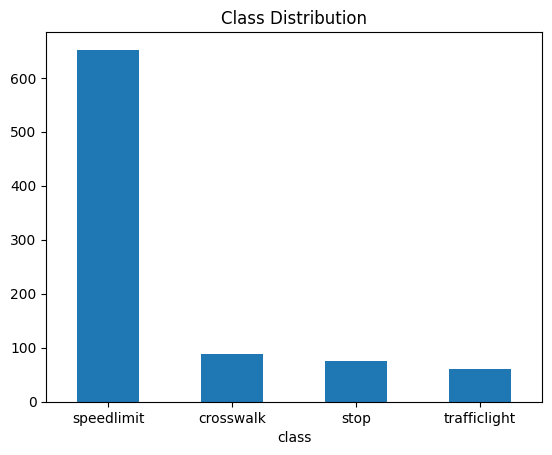

In [ ]:
#Gets the count of each class in the dataframe
counts = df["class"].value_counts()

# create bar plot of counts
ax = counts.plot.bar(rot=0, title="Class Distribution")

# Visualize Images

### Path to Images

In [ ]:
#Gets and stores the path to the road_sign_images folder
images = os.listdir("drive/MyDrive/road_sign_images")

### Bounding Box for First Images

In [ ]:
row = df.loc[df["filename"] == images[0]]  #Gets the row that has the same file name as the first image

# Get each value for coordinates to build bounding box
xmin = row["xmin"].values[0]
ymin = row["ymin"].values[0]
xmax = row["xmax"].values[0]
ymax = row["ymax"].values[0]

#creates a color and thickness that will be used to create the bounding box
color = (0,255,0)
thickness = 2

### Visualize First Image with Bounding Box

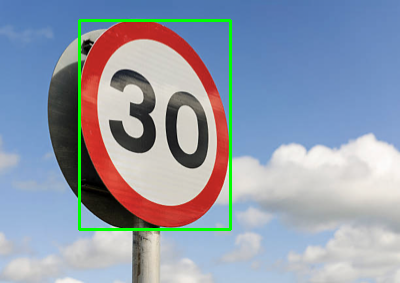

(283, 400, 3)


In [ ]:
#Reads the first image in images
image = cv.imread(f"drive/MyDrive/road_sign_images/{images[0]}")

#Draws a rectangle using the two points from the csv file
cv.rectangle(image, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)

#Shows the image and bounding box
cv2_imshow(image)
print(image.shape) #checking first image size

### Down sample oversaturated classes

*Speed Limit* | *Crosswalk* | *Stop* | *Traffic Light*
------- | -------- | -------- | --------
652 | 88 | 76 | 61

In [ ]:
#Separates each class into its own dataframe
majority_class = df[df["class"] == counts.idxmax()]
cw_class = df[df["class"] == "crosswalk"]
stop_class = df[df["class"] == "stop"]
minority_class = df[df["class"] == counts.idxmin()]

#down samples each class to the same size as the minority class
downsampled_majority = majority_class.sample(n=int(len(minority_class)), random_state=42)
downsampled_cw = cw_class.sample(n=int(len(minority_class)), random_state=42)
downsampled_stop = stop_class.sample(n=int(len(minority_class)), random_state=42)

In [ ]:
#Creates a new dataframe that is balanced with the new down sampled classes
balanced_df = pd.concat([downsampled_majority, downsampled_cw, downsampled_stop, minority_class])
balanced_df = balanced_df.reset_index(drop=True)   #Shuffles and resets the indexes of the new dataframe
print(balanced_df)

        filename  width  height         class  xmin  ymin  xmax  ymax
0    road862.png    300     400    speedlimit   214    29   287   101
1    road442.png    300     400    speedlimit    91   138   119   165
2    road437.png    300     400    speedlimit   165   245   201   280
3    road411.png    300     400    speedlimit   119    77   162   119
4    road232.png    300     400    speedlimit   127   221   142   234
..           ...    ...     ...           ...   ...   ...   ...   ...
239  road820.png    300     400  trafficlight    79   224    90   247
240  road822.png    300     400  trafficlight    35   308    58   352
241  road825.png    300     400  trafficlight     5   335    24   363
242  road846.png    300     400  trafficlight   208   224   228   278
243    road9.png    300     400  trafficlight    81   119   158   336

[244 rows x 8 columns]


In [ ]:
#Gets the count of each class from the new balanced dataframe
counts = balanced_df["class"].value_counts()
print(counts)

class
speedlimit      61
crosswalk       61
stop            61
trafficlight    61
Name: count, dtype: int64


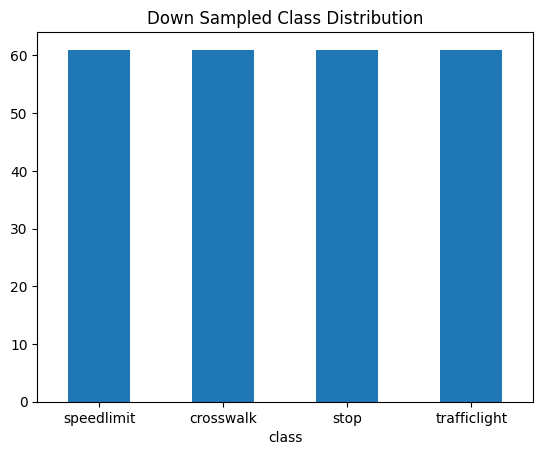

In [ ]:
# create bar plot of counts
ax = counts.plot.bar(rot=0, title="Down Sampled Class Distribution")

### Saving down sampled images

In [ ]:
# Define the source and destination directories
image_dir = "drive/MyDrive/road_sign_images/"
ds_path = "drive/MyDrive/downsampled_folder"

# Create the dataset folder if it doesn't exist
if not os.path.exists(ds_path):
    os.mkdir(ds_path)

#creates a folder for the downsampled images
ds_images_path = "drive/MyDrive/downsampled_folder/downsampled_images"
if not os.path.exists(ds_images_path):
    os.mkdir(ds_images_path)

# Iterate through the list of images
for i in images:
    # Check if the image filename is in the balanced_df
    if i in balanced_df["filename"].values:
        # Define the path to the original image
        image_path = os.path.join(image_dir, i)

        # Define the path to save the image in the dataset folder
        ds_image_path = os.path.join(ds_images_path, i)

        # Copy the image to the dataset folder
        #Uncomment to copy images into the downsampled folder
        #shutil.copy(image_path, ds_image_path)

#Saves the down sampled dataset to a csv in the ds_folder
ds_df_path = "drive/MyDrive/downsampled_folder/downsampled_df.csv"

#Uncomment to save the downsampled dataset csv.
'''if not os.path.exists(ds_df_path):
  balanced_df.to_csv(ds_df_path)'''

'if not os.path.exists(ds_df_path):\n  balanced_df.to_csv(ds_df_path)'

### Image Resizing

In [ ]:
min_width = df["width"].min()
min_height = df["height"].min()

max_width = df["width"].max()
max_height = df["height"].max()

print(f"Min values: {min_width}, {min_height}\nMax values: {max_width}, {max_height}.")

Min values: 254, 166
Max values: 400, 400.


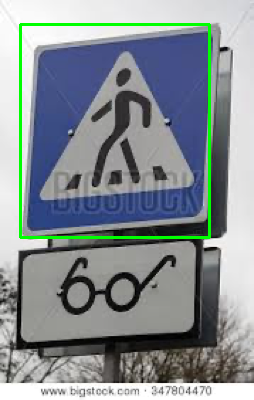

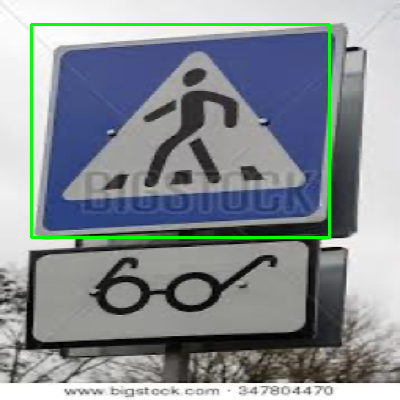

Transformed image shape:  (400, 400, 3) 
Original shape:  (400, 254, 3)


In [ ]:
# risizing the image to 400, 400
new_width, new_height = 400, 400

#Grabs the location and reads the image from the ds_folder
ds_images = os.listdir("drive/MyDrive/downsampled_folder/downsampled_images")
image = cv.imread(f"drive/MyDrive/downsampled_folder/downsampled_images/{ds_images[0]}")

orig_height, orig_width, channels = image.shape   #Assigns the current image shape values to its corresponding variables.

#Determines what to scale the x and y bbox values by for the current image.
scale_x = new_width / orig_width
scale_y = new_height / orig_height

#Gets the row with the same filename as the current image.
row = balanced_df.loc[balanced_df["filename"] == ds_images[0]]

#Gets each value for the bbox points.
xmin = row["xmin"].values[0]
ymin = row["ymin"].values[0]
xmax = row["xmax"].values[0]
ymax = row["ymax"].values[0]

#Scales the minimum points.
trans_xmin = int(xmin * scale_x)
trans_ymin = int(ymin * scale_y)

#Scales the maximum points.
trans_xmax = int(xmax * scale_x)
trans_ymax = int(ymax * scale_y)

#Resizes image
transformed_image = cv.resize(image, (new_width, new_height))
temp_trans_image = transformed_image
temp_image = image

cv.rectangle(temp_trans_image, (trans_xmin, trans_ymin), (trans_xmax, trans_ymax), color= color, thickness=thickness)  #Draws a bbox with the scaled values
cv.rectangle(temp_image, (xmin, ymin), (xmax, ymax), color= color, thickness=thickness)

#Displays image and shape.
cv2_imshow(temp_image)
cv2_imshow(temp_trans_image)

#Prints the shape of the transformed image and the original image
print("Transformed image shape: " ,temp_trans_image.shape,"\nOriginal shape: ", temp_image.shape)

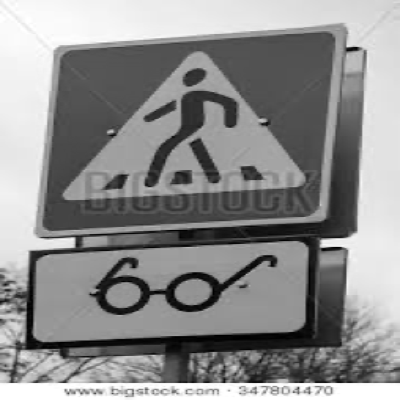

In [ ]:
image = cv.imread(f"drive/MyDrive/downsampled_folder/downsampled_images/{ds_images[0]}")
transformed_image = cv.resize(image, (new_width, new_height))

#Takes the new transformed_image and turns it into grayscale
gs_image = cv.cvtColor(transformed_image, cv.COLOR_BGR2GRAY)
cv2_imshow(gs_image)

###Saving transformed images

In [ ]:
#Grabs the location and reads the image from the ds_folder
ds_images = os.listdir("drive/MyDrive/downsampled_folder/downsampled_images")

transformed_df = balanced_df.copy()
transformed_path = "drive/MyDrive/transformed_downsampled_folder"
transformed_images_path = os.path.join(transformed_path, "transformed_downsampled_images")

# Create the dataset folder if it doesn't exist
if not os.path.exists(transformed_path):
    os.makedirs(transformed_path)

# Create a folder for the transformed images if it doesn't exist
if not os.path.exists(transformed_images_path):
    os.makedirs(transformed_images_path)

for i in ds_images:
  image = cv.imread(f"drive/MyDrive/downsampled_folder/downsampled_images/{i}")

  orig_height, orig_width, channels = image.shape   #Assigns the current image shape values to its corresponding variables.

  #Determines what to scale the x and y bbox values by for the current image.
  scale_x = new_width / orig_width
  scale_y = new_height / orig_height

  #Gets the row with the same filename as the current image.
  row = transformed_df.loc[transformed_df["filename"] == i]

  #Gets each value for the bbox points.
  xmin = row["xmin"].values[0]
  ymin = row["ymin"].values[0]
  xmax = row["xmax"].values[0]
  ymax = row["ymax"].values[0]

  #Scales the minimum points.
  trans_xmin = int(xmin * scale_x)
  trans_ymin = int(ymin * scale_y)

  #Scales the maximum points.
  trans_xmax = int(xmax * scale_x)
  trans_ymax = int(ymax * scale_y)
  transformed_image = cv.resize(image, (new_width, new_height))
  gs_image = cv.cvtColor(transformed_image, cv.COLOR_BGR2GRAY)


  transformed_df.loc[row.index, "xmin"] = trans_xmin
  transformed_df.loc[row.index, "ymin"] = trans_ymin
  transformed_df.loc[row.index, "xmax"] = trans_xmax
  transformed_df.loc[row.index, "ymax"] = trans_ymax

# Define the path to save the image in the transformed images folder
  save_image_path = os.path.join(transformed_images_path, i)

  # Uncomment to save the transformed and grayscale image
  #cv.imwrite(save_image_path, gs_image)

# Define the path to save the updated DataFrame
transformed_df_path = os.path.join(transformed_path, "transformed_downsampled_df.csv")

# Uncomment to save the downsampled dataset to a CSV in the transformed folder
#transformed_df.to_csv(transformed_df_path, index=False)